# Predicción de demanda de alquileres sitycleta por países

## Regresion por paices saber cantidad de alquiler por paices
## tranformar las estaciones de salida a numerico

## Documentación

ID de cada Pais

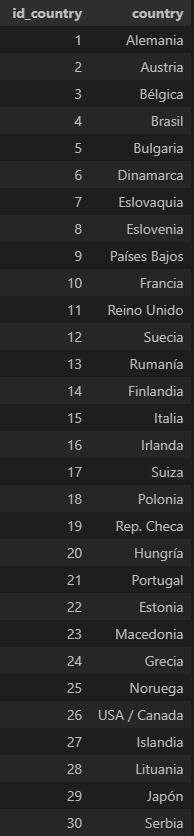

# Inicio del Proyecto

In [243]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [244]:
df_clima = pd.read_csv('data/time_df.csv', sep=';')
df_clima

,prec,presMax,presMin,racha,tmax,tmed,tmin,velmedia,moth,day
0,3.10,1015.70,1012.00,11.40,22.30,20.60,19.00,2.80,12,1
1,1.10,1012.90,1008.80,7.80,23.00,20.70,18.40,3.30,12,2
2,7.10,1009.70,1006.50,6.70,20.10,18.90,17.70,1.70,12,3
3,0.00,1007.70,1004.90,3.90,23.00,20.10,17.20,1.10,12,4
4,0.40,1015.00,1006.10,6.90,24.20,22.00,19.90,1.40,12,5
5,0.00,1015.10,1010.90,3.60,24.90,21.70,18.50,0.30,12,6
6,0.80,1010.90,1005.60,3.30,22.70,20.80,19.00,1.10,12,7
7,0.00,1010.00,1005.70,4.70,23.70,22.00,20.20,0.60,12,8
8,0.00,1015.20,1009.20,6.10,25.00,22.40,19.90,0.80,12,9
9,0.00,1017.30,1014.10,5.00,24.80,22.40,20.00,0.80,12,10


In [245]:
df_sagulpa = pd.read_csv('data/sagulpa_df.csv', sep=';')
df_sagulpa

,id_country,country,start_place,start_day,start_month,start_h,start_min,start_seg,end_day,end_month,end_h,end_min,end_seg,user_time
0,18,Polonia,Plazoleta de Farray,13,12,20,59,23,14,12,8,6,9,11:06:46
1,20,Hungría,C.C. El Muelle,2,12,12,51,2,2,12,21,54,10,09:03:08
2,14,Finlandia,Plaza de España (elect.),27,12,11,12,16,27,12,19,50,51,08:38:35
3,11,Reino Unido,Teatro Pérez Galdós,27,12,22,18,4,28,12,6,37,52,08:19:48
4,11,Reino Unido,Churruca,30,12,22,29,17,31,12,6,47,42,08:18:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,18,Polonia,San Telmo,28,12,14,37,34,28,12,14,38,28,00:00:54
4280,15,Italia,Plaza de la feria,13,12,11,46,49,13,12,11,47,38,00:00:49
4281,11,Reino Unido,Plazoleta de Farray,4,12,21,8,3,4,12,21,8,49,00:00:46
4282,14,Finlandia,Plaza de la feria,1,12,9,11,42,1,12,9,12,27,00:00:45


In [246]:
df_sagulpa[['user_h', 'user_min', 'user_seg']] = df_sagulpa['user_time'].str.split(':', expand=True)
df = df_sagulpa.drop('user_time', axis=1)
df

,id_country,country,start_place,start_day,start_month,start_h,start_min,start_seg,end_day,end_month,end_h,end_min,end_seg,user_h,user_min,user_seg
0,18,Polonia,Plazoleta de Farray,13,12,20,59,23,14,12,8,6,9,11,06,46
1,20,Hungría,C.C. El Muelle,2,12,12,51,2,2,12,21,54,10,09,03,08
2,14,Finlandia,Plaza de España (elect.),27,12,11,12,16,27,12,19,50,51,08,38,35
3,11,Reino Unido,Teatro Pérez Galdós,27,12,22,18,4,28,12,6,37,52,08,19,48
4,11,Reino Unido,Churruca,30,12,22,29,17,31,12,6,47,42,08,18,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,18,Polonia,San Telmo,28,12,14,37,34,28,12,14,38,28,00,00,54
4280,15,Italia,Plaza de la feria,13,12,11,46,49,13,12,11,47,38,00,00,49
4281,11,Reino Unido,Plazoleta de Farray,4,12,21,8,3,4,12,21,8,49,00,00,46
4282,14,Finlandia,Plaza de la feria,1,12,9,11,42,1,12,9,12,27,00,00,45


In [247]:
# Renombrar las columnas
nuevos_nombres = {' tmed': 'tmed', ' tmin': 'tmin', ' velmedia': 'velmedia'}
df_clima = df_clima.rename(columns=nuevos_nombres)

for index, row in df_sagulpa.iterrows():
    match = df_clima[(df_clima['day'] == row['start_day'])]
    if not match.empty:
        df_sagulpa.loc[index, 'prec'] = match.iloc[0]['prec']
        df_sagulpa.loc[index, 'presMax'] = match.iloc[0]['presMax']
        df_sagulpa.loc[index, 'presMin'] = match.iloc[0]['presMin']
        df_sagulpa.loc[index, 'tmax'] = match.iloc[0]['tmax']
        df_sagulpa.loc[index, 'tmed'] = match.iloc[0]['tmed']
        df_sagulpa.loc[index, 'tmin'] = match.iloc[0]['tmin']
        df_sagulpa.loc[index, 'velmedia'] = match.iloc[0]['velmedia']

In [248]:
df_sagulpa.columns

Index(['id_country', 'country', 'start_place', 'start_day', 'start_month',
       'start_h', 'start_min', 'start_seg', 'end_day', 'end_month', 'end_h',
       'end_min', 'end_seg', 'user_time', 'user_h', 'user_min', 'user_seg',
       'prec', 'presMax', 'presMin', 'tmax', 'tmed', 'tmin', 'velmedia'],
      dtype='object')

[Text(0.5, 0, 'id_country'),
 Text(1.5, 0, 'start_day'),
 Text(2.5, 0, 'start_month'),
 Text(3.5, 0, 'start_h'),
 Text(4.5, 0, 'start_min'),
 Text(5.5, 0, 'start_seg'),
 Text(6.5, 0, 'end_day'),
 Text(7.5, 0, 'end_month'),
 Text(8.5, 0, 'end_h'),
 Text(9.5, 0, 'end_min'),
 Text(10.5, 0, 'end_seg'),
 Text(11.5, 0, 'prec'),
 Text(12.5, 0, 'presMax'),
 Text(13.5, 0, 'presMin'),
 Text(14.5, 0, 'tmax'),
 Text(15.5, 0, 'tmed'),
 Text(16.5, 0, 'tmin'),
 Text(17.5, 0, 'velmedia')]

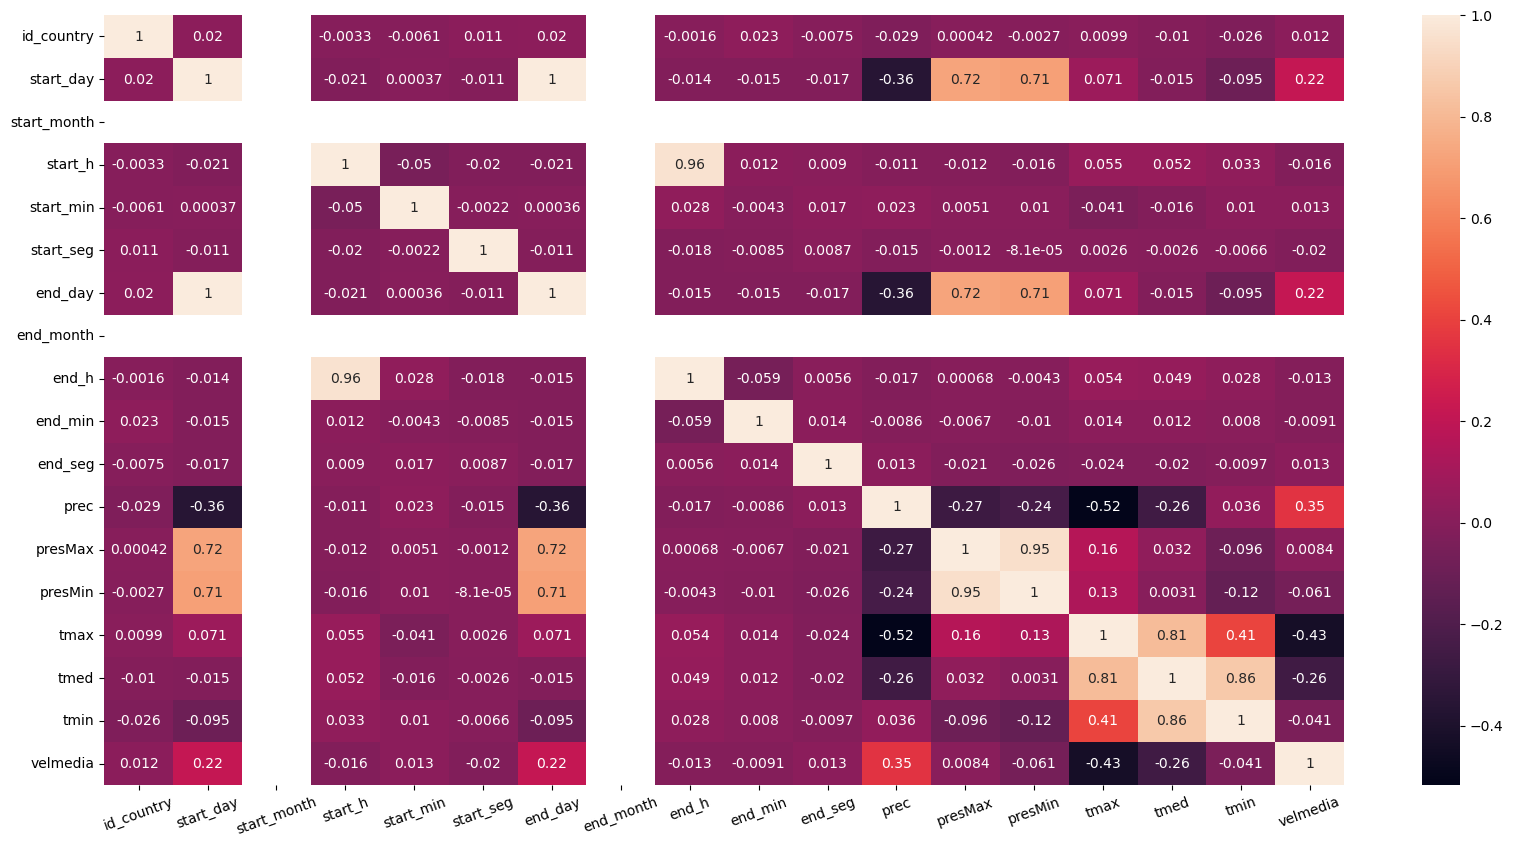

In [249]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
sns.heatmap(df_sagulpa.corr(), annot=True)

# Ajustar las etiquetas del eje x en horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

## Eliminamos columnas para preparar el DF_final

In [250]:
colum_delete = ['start_month','start_min', 'start_h', 'start_seg', 'end_day', 'end_month', 'end_h', 'end_min', 'end_seg', 'user_time', 'user_h', 'user_min', 'user_min', 'user_seg', 'country']
df_final = df_sagulpa.drop(columns=colum_delete)
df_final

,id_country,start_place,start_day,prec,presMax,presMin,tmax,tmed,tmin,velmedia
0,18,Plazoleta de Farray,13,0.00,1017.20,1015.00,25.00,22.20,19.40,1.10
1,20,C.C. El Muelle,2,1.10,1012.90,1008.80,23.00,20.70,18.40,3.30
2,14,Plaza de España (elect.),27,0.00,1019.70,1012.00,22.50,21.10,19.70,4.70
3,11,Teatro Pérez Galdós,27,0.00,1019.70,1012.00,22.50,21.10,19.70,4.70
4,11,Churruca,30,0.00,1022.10,1019.50,24.90,22.50,20.10,1.90
...,...,...,...,...,...,...,...,...,...,...
4279,18,San Telmo,28,0.00,1020.60,1018.10,23.20,21.80,20.50,1.10
4280,15,Plaza de la feria,13,0.00,1017.20,1015.00,25.00,22.20,19.40,1.10
4281,11,Plazoleta de Farray,4,0.00,1007.70,1004.90,23.00,20.10,17.20,1.10
4282,14,Plaza de la feria,1,3.10,1015.70,1012.00,22.30,20.60,19.00,2.80


In [251]:
# Contar el número de cogidas de bicicletas por base ,id_country y dia
word = df_final.groupby(['start_place','start_day']).size().reset_index(name='catch_for_day')

# hacemos una muestra buscando por el nombre de una base
word[word['start_place'] == 'C.C. El Muelle']

,start_place,start_day,catch_for_day
83,C.C. El Muelle,1,3
84,C.C. El Muelle,2,5
85,C.C. El Muelle,3,1
86,C.C. El Muelle,4,5
87,C.C. El Muelle,5,6
88,C.C. El Muelle,6,6
89,C.C. El Muelle,7,4
90,C.C. El Muelle,8,5
91,C.C. El Muelle,10,7
92,C.C. El Muelle,11,12


In [252]:
# Realizar la fusión basada en la columna 'start_place' y 'start_day'
df_final = df_final.merge(word, on=['start_place', 'start_day'], how='left')

# Asignar valores numéricos correlativos a la columna 'start_place'
df_final['id_place'] = df_final['start_place'].rank(method='dense').astype(int)

# leiminamos la columna string de nombres de base
df_final = df_final.drop('start_place', axis=1)

# renombrar el nombre de las columnas
df_final.rename(columns={'start_day': 'day'}, inplace=True)

# mostramos el df
df_final 

,id_country,day,prec,presMax,presMin,tmax,tmed,tmin,velmedia,catch_for_day,id_place
0,18,13,0.00,1017.20,1015.00,25.00,22.20,19.40,1.10,9,41
1,20,2,1.10,1012.90,1008.80,23.00,20.70,18.40,3.30,5,6
2,14,27,0.00,1019.70,1012.00,22.50,21.10,19.70,4.70,8,38
3,11,27,0.00,1019.70,1012.00,22.50,21.10,19.70,4.70,6,48
4,11,30,0.00,1022.10,1019.50,24.90,22.50,20.10,1.90,13,14
...,...,...,...,...,...,...,...,...,...,...,...
4279,18,28,0.00,1020.60,1018.10,23.20,21.80,20.50,1.10,16,44
4280,15,13,0.00,1017.20,1015.00,25.00,22.20,19.40,1.10,5,39
4281,11,4,0.00,1007.70,1004.90,23.00,20.10,17.20,1.10,13,41
4282,14,1,3.10,1015.70,1012.00,22.30,20.60,19.00,2.80,7,39


[Text(0.5, 0, 'id_country'),
 Text(1.5, 0, 'day'),
 Text(2.5, 0, 'prec'),
 Text(3.5, 0, 'presMax'),
 Text(4.5, 0, 'presMin'),
 Text(5.5, 0, 'tmax'),
 Text(6.5, 0, 'tmed'),
 Text(7.5, 0, 'tmin'),
 Text(8.5, 0, 'velmedia'),
 Text(9.5, 0, 'catch_for_day'),
 Text(10.5, 0, 'id_place')]

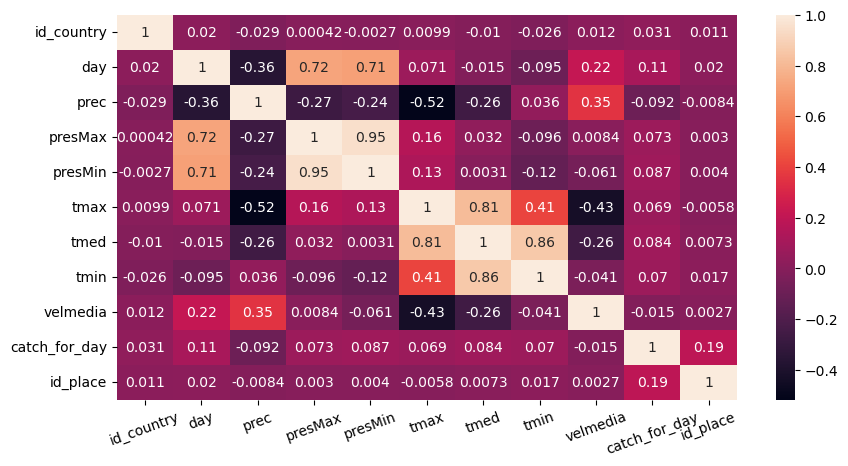

In [253]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.heatmap(df_final.corr(), annot=True)

# Ajustar las etiquetas del eje x en horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

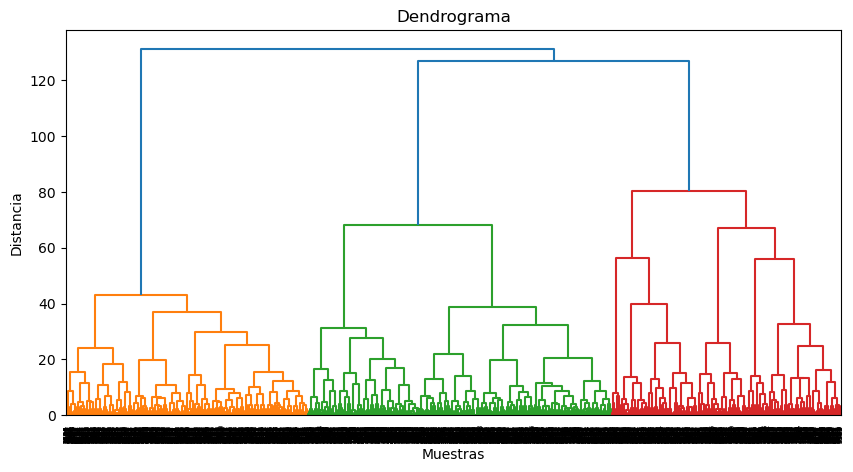

In [254]:
# Cargamos el dataset y lo preprocesamos
iris = df_final
X = df_final.drop(['catch_for_day'], axis=1)
Y = df_final['catch_for_day']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculamos la matriz de enlace
Z = linkage(X_scaled, method='ward')

# Creamos el dendrograma
plt.figure(figsize=(10, 5))
plt.title('Dendrograma')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
dendrogram(Z)
plt.show()

In [ ]:
# Dividimos los datos de entrenamiento
X = df_final.drop(['catch_for_day'], axis=1)
Y = df_final['catch_for_day']

# División de los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
# Estandarización de características numéricas
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Inicialización de LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

# Entrenamiento y evaluación de los modelos
models, predictions = reg.fit(x_train, x_test, y_train, y_test)

# Imprimir los modelos
print(models)

In [261]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [256]:
# df_final.to_csv('result/sagulpa.csv', index=False)